In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy.interpolate import interp1d
from poke.thinfilms import compute_thin_films_broadcasted
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
pth = 'coatings/opticoat_protag_12deg.csv'
data = np.genfromtxt(pth,delimiter=',').T

[ 588.4057971   595.65217391  600.          620.28985507  637.68115942
  653.62318841  678.26086957  686.95652174  700.          710.14492754
  723.1884058   733.33333333  740.57971014  752.17391304  766.66666667
  776.8115942   782.60869565  788.4057971   791.30434783  798.55072464
  801.44927536  810.14492754  817.39130435  828.98550725  843.47826087
  852.17391304  859.42028986  866.66666667  878.26086957  885.50724638
  889.85507246  897.10144928  901.44927536  901.44927536  914.49275362
  921.73913043  930.43478261  942.02898551  950.72463768  982.60869565
  988.4057971   994.20289855 1001.44927536 1017.39130435 1031.88405797
 1047.82608696 1071.01449275 1092.75362319 1117.39130435 1131.88405797
 1140.57971014 1162.31884058 1176.8115942  1195.65217391 1213.04347826
 1233.33333333 1243.47826087 1250.72463768]


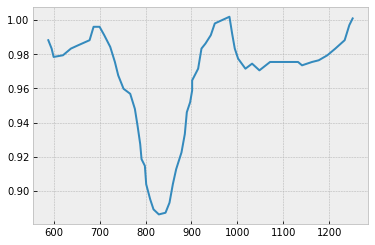

In [3]:
plt.plot(data[0],data[1])
print(data[0])

In [4]:
spline = interp1d(data[0],data[1],kind='linear')

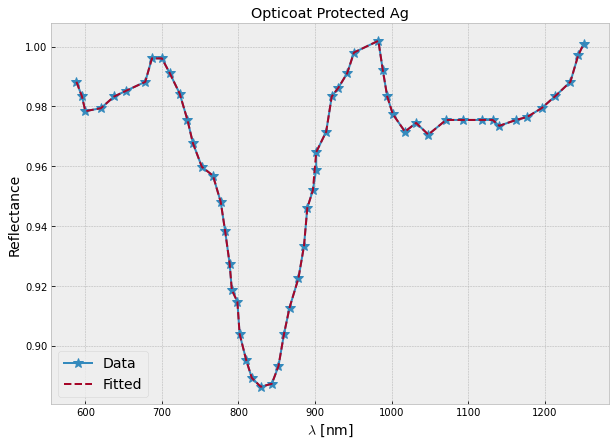

In [5]:
plt.figure(figsize=[10,7])
plt.title('Opticoat Protected Ag')
plt.ylabel('Reflectance',fontsize=14)
plt.xlabel(r'$\lambda$'+' [nm]',fontsize=14)
plt.plot(data[0],data[1],label='Data',marker='*',markersize=10)
plt.plot(data[0],spline(data[0]),label='Fitted',linestyle='dashed')
plt.legend(fontsize=14)
plt.show()

## Now we load the constituent materials

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


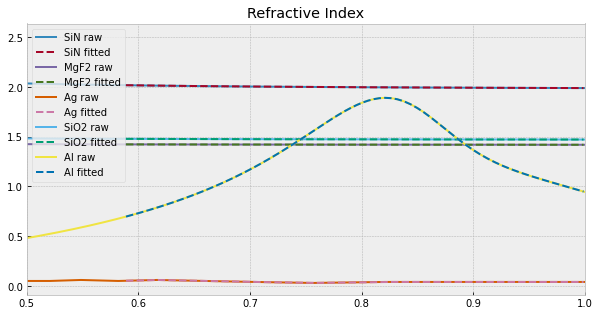

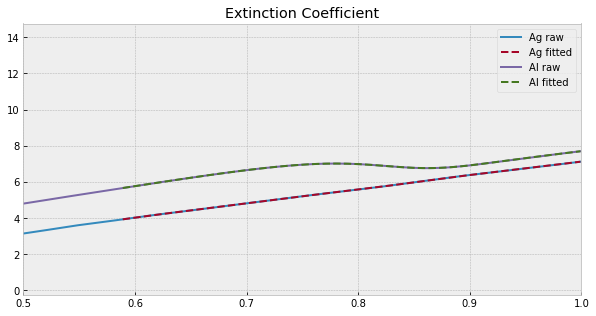

In [71]:
aoi = 12
wvl = np.arange(589,1000,1)

# create coating splines
pth_SiN = 'coatings/Philipp_SiN.csv'
dat_SiN = np.genfromtxt(pth_SiN,delimiter=',',skip_header=1)[:500].T
n_SiN = interp1d(dat_SiN[0],dat_SiN[1])

pth_MgF2 = 'coatings/Rodriguez-de Marcos_MgF2.csv'
dat_MgF2 = np.genfromtxt(pth_MgF2,delimiter=',',skip_header=1)[:962].T
kdat_MgF2 = np.genfromtxt(pth_MgF2,delimiter=',',skip_header=1)[964:].T
nd_MgF2 = interp1d(dat_MgF2[0],dat_MgF2[1])
k_MgF2 = interp1d(kdat_MgF2[0],kdat_MgF2[1])
n_MgF2 = lambda wave: nd_MgF2(wave) + 1j*k_MgF2(wave)

pth_SiO2 = 'coatings/Gao_SiO2.csv'
dat_SiO2 = np.genfromtxt(pth_SiO2,delimiter=',',skip_header=1)[:500].T
n_SiO2 = interp1d(dat_SiO2[0],dat_SiO2[1])

pth_Ag = 'coatings/Johnson_Ag.csv'
ndat_Ag = np.genfromtxt(pth_Ag,delimiter=',',skip_header=1)[:50].T
kdat_Ag = np.genfromtxt(pth_Ag,delimiter=',',skip_header=1)[52:].T
nd_Ag = interp1d(ndat_Ag[0],ndat_Ag[1])
k_Ag = interp1d(kdat_Ag[0],kdat_Ag[1])
n_Ag = lambda wave: nd_Ag(wave) + 1j*k_Ag(wave)

pth_Al = 'coatings/Cheng_Al.csv'
ndat_Al = np.genfromtxt(pth_Al,delimiter=',',skip_header=1)[:427].T
kdat_Al = np.genfromtxt(pth_Al,delimiter=',',skip_header=1)[429:].T
nd_Al = interp1d(ndat_Al[0],ndat_Al[1])
k_Al = interp1d(kdat_Al[0],kdat_Al[1])
n_Al = lambda wave: nd_Al(wave) + 1j*k_Al(wave)

plt.figure(figsize=[10,5])
plt.title('Refractive Index')
plt.plot(dat_SiN[0],dat_SiN[1],label='SiN raw')
plt.plot(wvl*1e-3,n_SiN(wvl*1e-3),label='SiN fitted',linestyle='dashed')

plt.plot(dat_MgF2[0],dat_MgF2[1],label='MgF2 raw')
plt.plot(wvl*1e-3,n_MgF2(wvl*1e-3),label='MgF2 fitted',linestyle='dashed')

plt.plot(ndat_Ag[0],ndat_Ag[1],label='Ag raw')
plt.plot(wvl*1e-3,np.real(n_Ag(wvl*1e-3)),label='Ag fitted',linestyle='dashed')

plt.plot(dat_SiO2[0],dat_SiO2[1],label='SiO2 raw')
plt.plot(wvl*1e-3,n_SiO2(wvl*1e-3),label='SiO2 fitted',linestyle='dashed')

plt.plot(ndat_Al[0],ndat_Al[1],label='Al raw')
plt.plot(wvl*1e-3,n_Al(wvl*1e-3),label='Al fitted',linestyle='dashed')
plt.legend()
plt.xlim([0.5,1])
plt.show()

plt.figure(figsize=[10,5])
plt.title('Extinction Coefficient')
plt.plot(kdat_Ag[0],kdat_Ag[1],label='Ag raw')
plt.plot(wvl*1e-3,np.imag(n_Ag(wvl*1e-3)),label='Ag fitted',linestyle='dashed')
plt.plot(kdat_Al[0],kdat_Al[1],label='Al raw')
plt.plot(wvl*1e-3,np.imag(n_Al(wvl*1e-3)),label='Al fitted',linestyle='dashed')
plt.legend()
plt.xlim([0.5,1])
plt.show()

## Optimize a spline using SiO2 layer thickness as variable to get final solution

In [72]:
def fit_coating(d):

    # build stack
    stack = [
        (n_MgF2(wvl*1e-3),d),
        (n_Ag(wvl*1e-3))
    ]

    rs,_ = compute_thin_films_broadcasted(stack,np.full_like(wvl,np.radians(aoi)),wvl,substrate_index=n_Ag(wvl*1e-3))
    rp,_ = compute_thin_films_broadcasted(stack,np.full_like(wvl,np.radians(aoi)),wvl,substrate_index=n_Ag(wvl*1e-3),polarization='p')
    avg = (np.abs(rs)**2 + np.abs(rp)**2)/2

    cost = np.sum((spline(wvl)-avg)**2)

    return cost

In [73]:
coating_test = np.arange(10,40,10)
rms = []
for d in coating_test:
    results = minimize(fit_coating,d,method='L-BFGS-B',options={'maxiter':1000},tol=1e-20)
    stack = [
        (n_MgF2(wvl*1e-3),results.x),
        (n_Ag(wvl*1e-3))
    ]

    rs,_ = compute_thin_films_broadcasted(stack,np.full_like(wvl,np.radians(aoi)),wvl,substrate_index=n_Ag(wvl*1e-3))
    rp,_ = compute_thin_films_broadcasted(stack,np.full_like(wvl,np.radians(aoi)),wvl,substrate_index=n_Ag(wvl*1e-3),polarization='p')
    avg = (np.abs(rs)**2 + np.abs(rp)**2)/2
    rms.append(np.std(avg-spline(wvl)))


In [74]:
print(results.x)
print(results.message)
print(fit_coating(10))
print(fit_coating(results.x))

[1289.99099113]
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
1.0194067832967588
0.6766825433662502


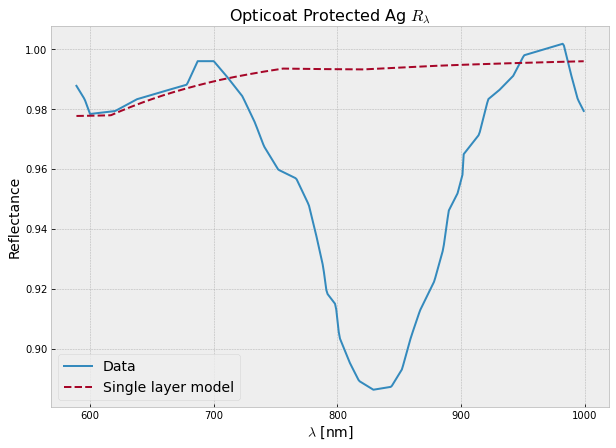

In [80]:
# build stack
stack = [
    (n_MgF2(wvl*1e-3),54),
    (n_Ag(wvl*1e-3))
]

rs,_ = compute_thin_films_broadcasted(stack,np.full_like(wvl,np.radians(aoi)),wvl,substrate_index=n_Ag(wvl*1e-3))
rp,_ = compute_thin_films_broadcasted(stack,np.full_like(wvl,np.radians(aoi)),wvl,substrate_index=n_Ag(wvl*1e-3),polarization='p')
avg = (np.abs(rs)**2 + np.abs(rp)**2)/2

plt.figure(figsize=[10,7])
plt.title('Opticoat Protected Ag'+r' $R_{\lambda}$',fontsize=16)
plt.plot(wvl,spline(wvl),label='Data')
plt.plot(wvl,avg,label='Single layer model',linestyle='dashed')
plt.legend(fontsize=14)
plt.ylabel('Reflectance',fontsize=14)
plt.xlabel(r'$\lambda$'+' [nm]',fontsize=14)
plt.show()

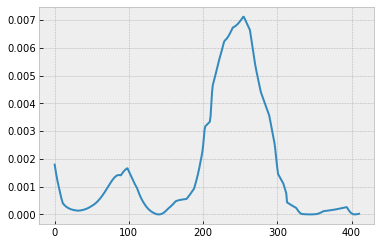

In [59]:
np.std(spline(wvl)-avg)
plt.plot((spline(wvl)-avg)**2)

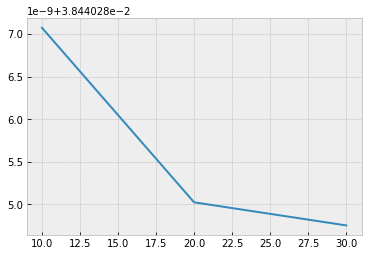

In [76]:
plt.plot(coating_test,rms)